run the notebook from the terminal with this command:\
jupyter notebook --ip=127.0.0.1 --NotebookApp.iopub_data_rate_limit=10000000

In [1]:
!pip install nltk
!pip install pandas
!pip install matplotlib

import nltk
import string, pprint, os
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.


[nltk_data] Downloading package stopwords to /home/tp-
[nltk_data]     home004/tdescha/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /home/tp-
[nltk_data]     home004/tdescha/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/tp-
[nltk_data]     home004/tdescha/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/tp-home004/tdescha/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [2]:
DOC_DIR="TEXTES"
text_list=[]
text_names=[]

In [3]:
def get_tokens(file):
    with open(file, 'r') as d:
        text = d.read()
        tokens = nltk.word_tokenize(clean_text(text))
        return tokens

def get_most_common_tokens(tokens, num):
    count = Counter(tokens)
    return count.most_common(num)

def clean_text(text):
        lowers = text.lower() #lower case for everyone
        #remove the punctuation using the character deletion step of translate
        punct_killer = str.maketrans('', '', string.punctuation)
        no_punctuation = lowers.translate(punct_killer)
        return no_punctuation

def get_text(file):
    with open(file, 'r') as d:
        text = d.read()
        return clean_text(text)
    
def tokenize(text):
    return nltk.word_tokenize(text)
    


def create_tfidf(dir):
    for subdir, dirs, files in os.walk(dir):
        for file in files:
            if file.endswith(".txt"):
                #print("treating "+file)
                file_path = subdir + os.path.sep + file
                #text_dict[file] = get_text(file_path)
                text_list.append(get_text(file_path))
                text_names.append(file)

def get_similarity(text1, text2, v):
    t1 = v.transform([text1])
    t2 = v.transform([text2])
    return cosine_similarity(t1,t2)

## Exercice 1: étude des lexiques

In [4]:
create_tfidf("data/texts")

In [6]:
text_list

['sent id100  and some predicted this would help build a new  larger audience for classical music  sent sent id101  such efforts have been successful to a point  leading to a string of highly popular crossover albums that topped pop charts  sent sent id102  a 1992 recording of henryk goreckis third symphony  a mournful work for soprano and orchestra by the contemporary polish composer  previously more cult figure than superstar  sold more than 1 million cds  sent',
 'sent id101  such efforts have been successful to a point  leading to a string of highly popular crossover albums that topped pop charts  sent sent id102  a 1992 recording of henryk goreckis third symphony  a mournful work for soprano and orchestra by the contemporary polish composer  previously more cult figure than superstar  sold more than 1 million cds  sent sent id103  even more successful was chant  recorded by benedictine monks in northern spain  sent',
 'sent id102  a 1992 recording of henryk goreckis third symphony

In [7]:
text=str(text_list)

Générez la liste des 1000 mots les plus fréquents du corpus.

In [8]:
tokens=tokenize(text)
bt=get_most_common_tokens(tokens,1000)

les mots les plus fréquents sont:
     d'une part "sent" présent au début et à la fin de chaque texte sous cette forme "<sentid="number"> /sent"
     les autres mots sont des stop words 
     
   ces mots sont inutile pour la description de notre corpus
        
Donc on filtre nos mots en enlevant les mots vides et le mot sent:

In [9]:
stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend(("'sent","sent","[","'","]",","))
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [10]:
f_tokens = [word for word in tokens if word not in stopwords]

In [11]:
f_tokens

['id100',
 'predicted',
 'would',
 'help',
 'build',
 'new',
 'larger',
 'audience',
 'classical',
 'music',
 'id101',
 'efforts',
 'successful',
 'point',
 'leading',
 'string',
 'highly',
 'popular',
 'crossover',
 'albums',
 'topped',
 'pop',
 'charts',
 'id102',
 '1992',
 'recording',
 'henryk',
 'goreckis',
 'third',
 'symphony',
 'mournful',
 'work',
 'soprano',
 'orchestra',
 'contemporary',
 'polish',
 'composer',
 'previously',
 'cult',
 'figure',
 'superstar',
 'sold',
 '1',
 'million',
 'cds',
 'id101',
 'efforts',
 'successful',
 'point',
 'leading',
 'string',
 'highly',
 'popular',
 'crossover',
 'albums',
 'topped',
 'pop',
 'charts',
 'id102',
 '1992',
 'recording',
 'henryk',
 'goreckis',
 'third',
 'symphony',
 'mournful',
 'work',
 'soprano',
 'orchestra',
 'contemporary',
 'polish',
 'composer',
 'previously',
 'cult',
 'figure',
 'superstar',
 'sold',
 '1',
 'million',
 'cds',
 'id103',
 'even',
 'successful',
 'chant',
 'recorded',
 'benedictine',
 'monks',
 'nort

In [75]:
lemma = WordNetLemmatizer()

lem=[]
for word in f_tokens:
    lem.append(lemma.lemmatize(word))

print (lem)

['id100', 'predicted', 'would', 'help', 'build', 'new', 'larger', 'audience', 'classical', 'music', 'id101', 'effort', 'successful', 'point', 'leading', 'string', 'highly', 'popular', 'crossover', 'album', 'topped', 'pop', 'chart', 'id102', '1992', 'recording', 'henryk', 'goreckis', 'third', 'symphony', 'mournful', 'work', 'soprano', 'orchestra', 'contemporary', 'polish', 'composer', 'previously', 'cult', 'figure', 'superstar', 'sold', '1', 'million', 'cd', 'id101', 'effort', 'successful', 'point', 'leading', 'string', 'highly', 'popular', 'crossover', 'album', 'topped', 'pop', 'chart', 'id102', '1992', 'recording', 'henryk', 'goreckis', 'third', 'symphony', 'mournful', 'work', 'soprano', 'orchestra', 'contemporary', 'polish', 'composer', 'previously', 'cult', 'figure', 'superstar', 'sold', '1', 'million', 'cd', 'id103', 'even', 'successful', 'chant', 'recorded', 'benedictine', 'monk', 'northern', 'spain', 'id102', '1992', 'recording', 'henryk', 'goreckis', 'third', 'symphony', 'mournf

In [76]:
get_most_common_tokens(lem,1000)

[('lrb', 391),
 ('rrb', 391),
 ('music', 370),
 ('aid', 290),
 ('year', 242),
 ('ad', 235),
 ('one', 233),
 ('country', 205),
 ('also', 179),
 ('disease', 178),
 ('change', 176),
 ('u', 167),
 ('time', 163),
 ('emission', 157),
 ('water', 152),
 ('program', 146),
 ('world', 146),
 ('africa', 145),
 ('nt', 144),
 ('people', 141),
 ('classical', 137),
 ('pop', 136),
 ('may', 132),
 ('african', 132),
 ('cent', 131),
 ('brazil', 131),
 ('woman', 129),
 ('dementia', 129),
 ('energy', 128),
 ('life', 123),
 ('many', 120),
 ('could', 120),
 ('health', 117),
 ('stage', 114),
 ('new', 112),
 ('person', 108),
 ('risk', 105),
 ('family', 105),
 ('even', 104),
 ('alzheimer', 104),
 ('million', 102),
 ('first', 102),
 ('international', 102),
 ('make', 101),
 ('land', 101),
 ('government', 100),
 ('work', 99),
 ('like', 99),
 ('would', 98),
 ('three', 98),
 ('used', 98),
 ('hiv', 97),
 ('care', 95),
 ('gas', 94),
 ('way', 91),
 ('help', 90),
 ('much', 90),
 ('drug', 90),
 ('often', 89),
 ('part', 89

Les noms et les verbes remontent dans la liste avec la lemmatization

On récupère les morpho-syntaxes de nos mots filtrés:

In [77]:
pos=(nltk.pos_tag(lem))
print(pos)

[('id100', 'NN'), ('predicted', 'VBD'), ('would', 'MD'), ('help', 'VB'), ('build', 'VB'), ('new', 'JJ'), ('larger', 'JJR'), ('audience', 'NN'), ('classical', 'JJ'), ('music', 'NN'), ('id101', 'NN'), ('effort', 'NN'), ('successful', 'JJ'), ('point', 'NN'), ('leading', 'VBG'), ('string', 'VBG'), ('highly', 'RB'), ('popular', 'JJ'), ('crossover', 'NN'), ('album', 'NN'), ('topped', 'VBD'), ('pop', 'JJ'), ('chart', 'NN'), ('id102', 'NN'), ('1992', 'CD'), ('recording', 'VBG'), ('henryk', 'NN'), ('goreckis', 'JJ'), ('third', 'JJ'), ('symphony', 'NN'), ('mournful', 'JJ'), ('work', 'NN'), ('soprano', 'NN'), ('orchestra', 'JJ'), ('contemporary', 'JJ'), ('polish', 'JJ'), ('composer', 'NN'), ('previously', 'RB'), ('cult', 'VBZ'), ('figure', 'NN'), ('superstar', 'NN'), ('sold', 'VBD'), ('1', 'CD'), ('million', 'CD'), ('cd', 'NN'), ('id101', 'NN'), ('effort', 'NN'), ('successful', 'JJ'), ('point', 'NN'), ('leading', 'VBG'), ('string', 'VBG'), ('highly', 'RB'), ('popular', 'JJ'), ('crossover', 'NN'),

Puis on extrait leurs tags:

In [78]:
tags=[]

for i in pos:
    tags.append(i[1])
            
print(tags)

['NN', 'VBD', 'MD', 'VB', 'VB', 'JJ', 'JJR', 'NN', 'JJ', 'NN', 'NN', 'NN', 'JJ', 'NN', 'VBG', 'VBG', 'RB', 'JJ', 'NN', 'NN', 'VBD', 'JJ', 'NN', 'NN', 'CD', 'VBG', 'NN', 'JJ', 'JJ', 'NN', 'JJ', 'NN', 'NN', 'JJ', 'JJ', 'JJ', 'NN', 'RB', 'VBZ', 'NN', 'NN', 'VBD', 'CD', 'CD', 'NN', 'NN', 'NN', 'JJ', 'NN', 'VBG', 'VBG', 'RB', 'JJ', 'NN', 'NN', 'VBD', 'JJ', 'NN', 'NN', 'CD', 'VBG', 'NN', 'JJ', 'JJ', 'NN', 'JJ', 'NN', 'NN', 'JJ', 'JJ', 'JJ', 'NN', 'RB', 'VBZ', 'NN', 'NN', 'VBD', 'CD', 'CD', 'NN', 'NNS', 'RB', 'JJ', 'NN', 'VBD', 'NN', 'NN', 'JJ', 'NN', 'NN', 'CD', 'VBG', 'NN', 'JJ', 'JJ', 'NN', 'JJ', 'NN', 'NN', 'JJ', 'JJ', 'JJ', 'NN', 'RB', 'VBZ', 'NN', 'NN', 'VBD', 'CD', 'CD', 'NN', 'NNS', 'RB', 'JJ', 'NN', 'VBD', 'NN', 'NN', 'JJ', 'NN', 'NN', 'RB', 'VBN', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'JJ', 'NN', 'NN', 'NN', 'VBD', 'RB', 'VBN', 'VBG', 'CD', 'NN', 'VBG', 'CD', 'NN', 'VBG', 'NN', 'NN', 'VBZ', 'JJ', 'NN', 'NN', 'NN', 'NN', 'JJS', 'JJ', 'NN', 'NN', 'NN', 'NN', 'VBG', 'NN', 'VBG', 'JJ', 'N

In [79]:
get_most_common_tokens(tags,15)

[('NN', 24632),
 ('JJ', 10064),
 ('RB', 2946),
 ('VBD', 2268),
 ('CD', 2033),
 ('VBG', 1951),
 ('VBN', 1324),
 ('VBP', 1218),
 ('VB', 974),
 ('IN', 765),
 ('NNS', 763),
 ('MD', 454),
 ('VBZ', 424),
 ('JJS', 249),
 ('JJR', 145)]

In [ ]:
Les groupes de mots les plus présent sont les noms. 

Le groupes à garder sont les verbes et noms qui sont sucesptibles de représenter le mieux un corpus.

## Représentation graphique

In [82]:
len(f_tokens)

50636

In [89]:
gmt=get_most_common_tokens(f_tokens,1000)

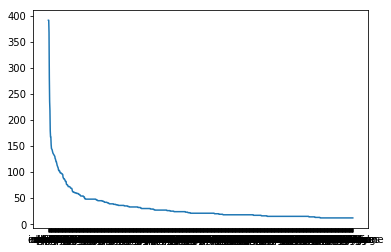

In [91]:
x=[]
y=[]

for i in gmt:
    x.append(i[0])
    y.append(i[1])

plt.plot(x,y)
plt.show()

In [16]:
len(bt)

1000

In [77]:
for i in len(bt)


print(bt[0:][0])

('sent', 5919)


In [84]:
create_tfidf("data/texts")
v = TfidfVectorizer(tokenizer=tokenize, stop_words='english')
tfidfs = v.fit_transform(text_list)

print(tfidfs)

  (0, 850)	0.1428082996622013
  (0, 3166)	0.10430338191487745
  (0, 4)	0.1069208567596467
  (0, 4446)	0.14870726503052378
  (0, 4654)	0.15629588623495355
  (0, 1927)	0.18497642596151365
  (0, 1242)	0.18497642596151365
  (0, 3765)	0.14463320410271246
  (0, 1055)	0.13798190851556388
  (0, 3685)	0.18497642596151365
  (0, 1141)	0.16694877802504232
  (0, 3447)	0.1411004592115336
  (0, 4464)	0.18497642596151365
  (0, 5154)	0.10269119931551612
  (0, 3245)	0.18497642596151365
  (0, 4689)	0.1411004592115336
  (0, 2144)	0.16694877802504232
  (0, 2266)	0.18497642596151365
  (0, 3975)	0.1244359179456111
  (0, 101)	0.16694877802504232
  (0, 2348)	0.14870726503052378
  (0, 895)	0.16694877802504232
  (0, 3695)	0.1114033984238874
  (0, 4818)	0.18497642596151365
  (0, 371)	0.18497642596151365
  :	:
  (11839, 2142)	0.11796633567672998
  (11839, 1866)	0.09909001040804577
  (11839, 3656)	0.15023846989137232
  (11839, 337)	0.12230115382078297
  (11839, 4003)	0.15023846989137232
  (11839, 4462)	0.1287080745

In [76]:
if __name__ == '__main__':
    tokens = get_tokens('data/texts/rd_12_psg_8_10.txt')
    create_tfidf("data/texts")
    v = TfidfVectorizer(tokenizer=tokenize, stop_words='english')
    tfidfs = v.fit_transform(text_list)
    print(v.vocabulary_['located'])
    print(tfidfs[1143,2960])                       

    print(text_names.index("rd_16_psg_38_40.txt"))

    str1 = 'this sentence has unseen text such as computer but also king lord juliet'
    str2 = 'i love computer text'
    print(get_similarity(str1,str2,v))

2960
0.0
579
[[0.50335909]]


In [92]:
import glob, re, pprint, csv
import xml.etree.ElementTree as ET
from collections import defaultdict
"""
if given result files in the form
score    rd_xx_psq_yy.*

and the annotated question file,
returns the MRR score 
"""

QUESTION_FILE='eval/QA4MRE-2012-EN_GS_annote.xml'

def calculate_mrr(dir, ext):
    ref = get_refs()

    mrr=0
    nb_q=0
    
    #get all files with a given extension. must be called rd_xxx_q_yyy though
    for sim_file in glob.glob(dir+"/*."+ext):
        r = get_first_correct_answer(ref, sim_file)
        if r != -1:
            mrr += 1/r
        nb_q+=1
    return (mrr/nb_q)

def get_refs():
    refs=defaultdict(dict)
    #qcm=open("QA4MRE-2012-EN_GS_annote.xml", "r", encoding="utf-8")
    qcm_tree = ET.parse(QUESTION_FILE)
    root=qcm_tree.getroot()

    for reading_test in root.findall('.//reading-test'):
        for question in reading_test.findall('.//q'):
            for rep in question.findall('.//position'):
                refs[reading_test.attrib['r_id']][question.attrib['q_id']]=rep.attrib['rep']
                #print("rt "+reading_test.attrib['r_id']+" q "+question.attrib['q_id']+" rep "+rep.attrib['rep'])
    return refs
    
def get_first_correct_answer(ref, res_file):

    n=re.match(r".*rd_([0-9]+)_q_([0-9]+)\..*", res_file)
    rank=1
    if n:
        rd_res, q_res=n.group(1), n.group(2)
        # the result file is for a given reading doc and a given question
        # the answer is in the sentence whose id is ref[rd_res][q_res]
        with open(res_file, newline='') as csvfile:
            f = csv.reader(csvfile, delimiter='\t', quotechar='|')
            for row in f:
                score=row[0]
                doc=row[1]
                #m=re.match(r"rd_([0-9]+)_psg_([0-9]+)_([0-9]+)\.", doc)
                m=re.match(r"rd_([0-9]+)_psg_([0-9]+)_([0-9]+)\.", doc)
                #print("nokn"+q_res)
                
                if m:
                    rd, p_deb, p_fin = m.group(1), m.group(2), m.group(3)
                    if(rd == rd_res) and (ref[rd_res][q_res] >= p_deb) and (ref[rd_res][q_res]<=p_fin):
                        print("first correct answer for rd "+rd+ " q "+q_res+" at rank "+str(rank))
                        return rank
                rank+=1
                        
    else:
        print("problem with filename :-(")
    return -1
        
if __name__ == '__main__':
    print("MRR: "+str(calculate_mrr("TPRI_qa4mre/QUESTIONS", "sim.ranked")))

ZeroDivisionError: division by zero